In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('variacaoValores.csv')
df_test = df.iloc[100:120]
df = df.iloc[0:100]

In [3]:
def create_window_cols(df, max_window):
    df_new = pd.DataFrame()
    dados = df.iloc[:, 1].values
    tam = len(dados)

    for i in range(tam - max_window):
        row_data = {}
        for j in range(max_window + 1):
            row_data[f'x-{max_window - j}'] = dados[i + j]
        df_new_row = pd.DataFrame([row_data])
        df_new = pd.concat([df_new, df_new_row], ignore_index=True)

    y = df_new[['x-0']]
    x = df_new.drop('x-0', axis=1)

    return df_new, x, y

def execute_grid_search(x_train, y_train, x_test, y_test, hidden_layer_size, grid_params):
    mlp_reg_rede1 = MLPRegressor(hidden_layer_sizes=hidden_layer_size)
    grid_rede1 = GridSearchCV(mlp_reg_rede1, grid_params, cv=5)
    grid_rede1.fit(x_train, y_train)
    y_predict = grid_rede1.predict(x_test)

    return y_predict, metrics.mean_absolute_error(y_test, y_predict), metrics.mean_squared_error(y_test, y_predict), metrics.r2_score(y_test, y_predict),  grid_rede1.best_estimator_.loss_, grid_rede1.best_estimator_.n_iter_



In [4]:
# Dados de treinamento
df_r1_train, x_r1_train, y_r1_train = create_window_cols(df, max_window=5)
df_r2_train, x_r2_train, y_r2_train = create_window_cols(df, max_window=10)
df_r3_train, x_r3_train, y_r3_train = create_window_cols(df, max_window=15)

# Dados de teste
df_r1_test, x_r1_test, y_r1_test = create_window_cols(df_test, max_window=5)
df_r2_test, x_r2_test, y_r2_test = create_window_cols(df_test, max_window=10)
df_r3_test, x_r3_test, y_r3_test = create_window_cols(df_test, max_window=15)

In [5]:
# Aplicação do scaler para os dados de teste
scaler = MinMaxScaler()

x_r1_train = scaler.fit_transform(x_r1_train)
x_r2_train = scaler.fit_transform(x_r2_train)
x_r3_train = scaler.fit_transform(x_r3_train)

y_r1_train = scaler.fit_transform(y_r1_train)
y_r2_train = scaler.fit_transform(y_r2_train)
y_r3_train = scaler.fit_transform(y_r3_train)

In [6]:
# Aplicação do scaler para os dados de teste
scaler = MinMaxScaler()

x_r1_test = scaler.fit_transform(x_r1_test)
x_r2_test = scaler.fit_transform(x_r2_test)
x_r3_test = scaler.fit_transform(x_r3_test)

y_r1_test = scaler.fit_transform(y_r1_test)
y_r2_test = scaler.fit_transform(y_r2_test)
y_r3_test = scaler.fit_transform(y_r3_test)

/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1770: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1770: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:780: Conv

Score Rede1- Solver SGD:  -0.038695526722476316
Epochs:  5000
Loss:  0.006587062258038172
Mean Absolute Error (MAE):  0.08653252688976745
Mean Square Error (MSE):  0.009766559316663292
Root Mean Squared Error (RMSE):  0.009766559316663292
R2 Score:  0.865359552165872


/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


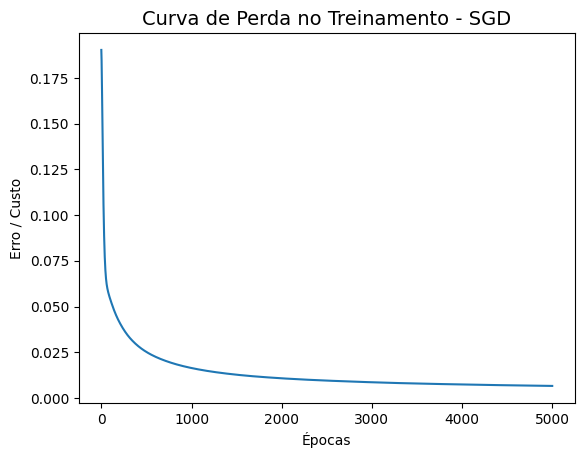

In [7]:
# Atividade 1 e 2 - Solver SGD
grid_params = {
    'hidden_layer_sizes': [(15)],
    'activation': ['relu'],
    'solver': ['sgd'],
    'max_iter': [5000],
    'tol': [0.000001],
    'momentum': [0.9],
    'early_stopping': [True],
    'epsilon': [1e-06],
    'learning_rate_init': [0.001],
    'learning_rate': ['constant']
}
mlp_reg_rede1 = MLPRegressor()
grid_rede1 = GridSearchCV(mlp_reg_rede1, grid_params, cv=5)
grid_rede1.fit(x_r1_train, y_r1_train)
y_predict = grid_rede1.predict(x_r1_test)

print("Score Rede1- Solver SGD: ", grid_rede1.best_score_)
print('Epochs: ', grid_rede1.best_estimator_.n_iter_)
print('Loss: ', grid_rede1.best_estimator_.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_r1_test, y_predict))
print('Mean Square Error (MSE): ', metrics.mean_squared_error(y_r1_test, y_predict))
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(y_r1_test, y_predict))
print('R2 Score: ', metrics.r2_score(y_r1_test, y_predict))

plt.plot(grid_rede1.best_estimator_.loss_curve_)
plt.title('Curva de Perda no Treinamento - SGD', fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Erro / Custo')
plt.show()

/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1770: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1770: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1770: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/skle

Score Rede1- Solver Adam:  0.7259380357035402
Epochs:  1104
Loss:  0.007710538669122655
Mean Absolute Error (MAE):  0.07756925263852314
Mean Square Error (MSE):  0.010414205687792673
Root Mean Squared Error (RMSE):  0.010414205687792673
R2 Score:  0.856431188079839


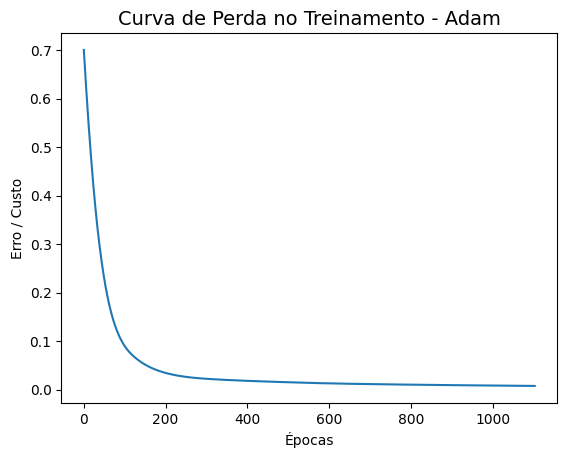

In [8]:
# Atividade 1 e 2 - Solver Adam
grid_params = {
    'hidden_layer_sizes': [(15)],
    'activation': ['relu'],
    'solver': ['adam'],
    'max_iter': [5000],
    'tol': [0.000001],
    'momentum': [0.9],
    'early_stopping': [True],
    'epsilon': [1e-06],
    'learning_rate_init': [0.001],
    'learning_rate': ['constant']
}
mlp_reg_rede1 = MLPRegressor()
grid_rede1 = GridSearchCV(mlp_reg_rede1, grid_params, cv=5)
grid_rede1.fit(x_r1_train, y_r1_train)
y_predict = grid_rede1.predict(x_r1_test)

print("Score Rede1- Solver Adam: ", grid_rede1.best_score_)
print('Epochs: ', grid_rede1.best_estimator_.n_iter_)
print('Loss: ', grid_rede1.best_estimator_.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_r1_test, y_predict))
print('Mean Square Error (MSE): ', metrics.mean_squared_error(y_r1_test, y_predict))
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(y_r1_test, y_predict))
print('R2 Score: ', metrics.r2_score(y_r1_test, y_predict))

plt.plot(grid_rede1.best_estimator_.loss_curve_)
plt.title('Curva de Perda no Treinamento - Adam', fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Erro / Custo')
plt.show()

In [10]:
# Atividade 3
df = pd.read_csv('variacaoValores.csv')

# Dados de teste
df_r1_test, x_r1_test, y_r1_test = create_window_cols(df.iloc[95:120], max_window=5)
df_r2_test, x_r2_test, y_r2_test = create_window_cols(df.iloc[90:120], max_window=10)
df_r3_test, x_r3_test, y_r3_test = create_window_cols(df.iloc[85:120], max_window=15)

# Aplicação do scaler para os dados de teste
scaler = MinMaxScaler()

x_r1_test = scaler.fit_transform(x_r1_test)
x_r2_test = scaler.fit_transform(x_r2_test)
x_r3_test = scaler.fit_transform(x_r3_test)

y_r1_test = scaler.fit_transform(y_r1_test)
y_r2_test = scaler.fit_transform(y_r2_test)
y_r3_test = scaler.fit_transform(y_r3_test)

grid_params = {
    'activation': ['relu'],
    'solver': ['adam'],
    'max_iter': [5000],
    'tol': [0.000001],
    'momentum': [0.9],
    'early_stopping': [True],
    'epsilon': [1e-06],
    'learning_rate_init': [0.001],
    'learning_rate': ['constant']
}

df_results_atividade_3 = pd.DataFrame({'Treinamento': ['1º (T1)', '2º (T2)', '3º (T3)']})
df_results_atividade_4 = pd.DataFrame({'Amostras': range(101, 121), 'f(t)': df_test['f(t)']})


# --------------------------------
#             REDE 1
# --------------------------------
for i in range(3):
  predicts, mae, mse, r2, loss, epochs = execute_grid_search(x_r1_train, y_r1_train, x_r1_test, y_r1_test, (15), grid_params)
  # Grid resultados Atividade 3
  df_results_atividade_3['Rede 1 - Perda T' + str(i)] = loss
  df_results_atividade_3['Rede 1 - Epochs T' + str(i)] = epochs

  # Grid resultados Atividade 4
  df_results_atividade_4['Rede 1 - T' + str(i)] = predicts
  df_results_atividade_4['Rede 1 - MAE T' + str(i)] = mae
  df_results_atividade_4['Rede 1 - MSE T' + str(i)] = mse
  df_results_atividade_4['Rede 1 - R2 Score T' + str(i)] = r2


# --------------------------------
#             REDE 2
# --------------------------------
for i in range(3):
  predicts, mae, mse, r2, loss, epochs = execute_grid_search(x_r2_train, y_r2_train, x_r2_test, y_r2_test, (25), grid_params)
  # Grid resultados Atividade 3
  df_results_atividade_3['Rede 2 - Perda T' + str(i)] = loss
  df_results_atividade_3['Rede 2 - Epochs T' + str(i)] = epochs

  # Grid resultados Atividade 4
  df_results_atividade_4['Rede 2 - T' + str(i)] = predicts
  df_results_atividade_4['Rede 2 - MAE T' + str(i)] = mae
  df_results_atividade_4['Rede 2 - MSE T' + str(i)] = mse
  df_results_atividade_4['Rede 2 - R2 Score T' + str(i)] = r2


# --------------------------------
#             REDE 3
# --------------------------------
for i in range(3):
  predicts, mae, mse, r2, loss, epochs = execute_grid_search(x_r3_train, y_r3_train, x_r3_test, y_r3_test, (50), grid_params)
  # Grid resultados Atividade 3
  df_results_atividade_3['Rede 3 - Perda T' + str(i)] = loss
  df_results_atividade_3['Rede 3 - Epochs T' + str(i)] = epochs

  # Grid resultados Atividade 4
  df_results_atividade_4['Rede 3 - T' + str(i)] = predicts
  df_results_atividade_4['Rede 3 - MAE T' + str(i)] = mae
  df_results_atividade_4['Rede 3 - MSE T' + str(i)] = mse
  df_results_atividade_4['Rede 3 - R2 Score T' + str(i)] = r2


/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1770: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1770: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1770: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/skle

In [11]:
display(df_results_atividade_3)

,Treinamento,Rede 1 - Perda T0,Rede 1 - Epochs T0,Rede 1 - Perda T1,Rede 1 - Epochs T1,Rede 1 - Perda T2,Rede 1 - Epochs T2,Rede 2 - Perda T0,Rede 2 - Epochs T0,Rede 2 - Perda T1,Rede 2 - Epochs T1,Rede 2 - Perda T2,Rede 2 - Epochs T2,Rede 3 - Perda T0,Rede 3 - Epochs T0,Rede 3 - Perda T1,Rede 3 - Epochs T1,Rede 3 - Perda T2,Rede 3 - Epochs T2
0,1º (T1),0.004141,1631,0.031426,45,0.002177,626,0.000208,639,0.000116,2160,0.002801,752,0.065191,27,0.000985,109,0.000038,1962
1,2º (T2),0.004141,1631,0.031426,45,0.002177,626,0.000208,639,0.000116,2160,0.002801,752,0.065191,27,0.000985,109,0.000038,1962
2,3º (T3),0.004141,1631,0.031426,45,0.002177,626,0.000208,639,0.000116,2160,0.002801,752,0.065191,27,0.000985,109,0.000038,1962


In [12]:
display(df_results_atividade_4)

,Amostras,f(t),Rede 1 - T0,Rede 1 - MAE T0,Rede 1 - MSE T0,Rede 1 - R2 Score T0,Rede 1 - T1,Rede 1 - MAE T1,Rede 1 - MSE T1,Rede 1 - R2 Score T1,...,Rede 3 - MSE T0,Rede 3 - R2 Score T0,Rede 3 - T1,Rede 3 - MAE T1,Rede 3 - MSE T1,Rede 3 - R2 Score T1,Rede 3 - T2,Rede 3 - MAE T2,Rede 3 - MSE T2,Rede 3 - R2 Score T2
100,101,0.4173,0.588924,0.077625,0.01404,0.807178,0.672013,0.21568,0.065415,0.101601,...,0.152362,-1.092538,0.533120,0.048957,0.003467,0.952383,0.535452,0.024607,0.000821,0.988728
101,102,0.0062,-0.005190,0.077625,0.01404,0.807178,0.215431,0.21568,0.065415,0.101601,...,0.152362,-1.092538,-0.093645,0.048957,0.003467,0.952383,-0.020852,0.024607,0.000821,0.988728
102,103,0.3387,0.738537,0.077625,0.01404,0.807178,0.365604,0.21568,0.065415,0.101601,...,0.152362,-1.092538,0.418425,0.048957,0.003467,0.952383,0.425277,0.024607,0.000821,0.988728
103,104,0.1886,0.257404,0.077625,0.01404,0.807178,0.523970,0.21568,0.065415,0.101601,...,0.152362,-1.092538,0.158808,0.048957,0.003467,0.952383,0.215962,0.024607,0.000821,0.988728
104,105,0.7418,0.638988,0.077625,0.01404,0.807178,0.337953,0.21568,0.065415,0.101601,...,0.152362,-1.092538,0.892175,0.048957,0.003467,0.952383,0.915266,0.024607,0.000821,0.988728
105,106,0.3138,0.370363,0.077625,0.01404,0.807178,0.192895,0.21568,0.065415,0.101601,...,0.152362,-1.092538,0.294708,0.048957,0.003467,0.952383,0.354560,0.024607,0.000821,0.988728
106,107,0.4466,0.591145,0.077625,0.01404,0.807178,0.517161,0.21568,0.065415,0.101601,...,0.152362,-1.092538,0.550765,0.048957,0.003467,0.952383,0.552212,0.024607,0.000821,0.988728
107,108,0.0835,0.085632,0.077625,0.01404,0.807178,0.310752,0.21568,0.065415,0.101601,...,0.152362,-1.092538,0.081791,0.048957,0.003467,0.952383,0.092280,0.024607,0.000821,0.988728
108,109,0.1930,0.247537,0.077625,0.01404,0.807178,0.436692,0.21568,0.065415,0.101601,...,0.152362,-1.092538,0.332575,0.048957,0.003467,0.952383,0.238623,0.024607,0.000821,0.988728
109,110,0.3807,0.324538,0.077625,0.01404,0.807178,0.649247,0.21568,0.065415,0.101601,...,0.152362,-1.092538,0.471487,0.048957,0.003467,0.952383,0.487815,0.024607,0.000821,0.988728


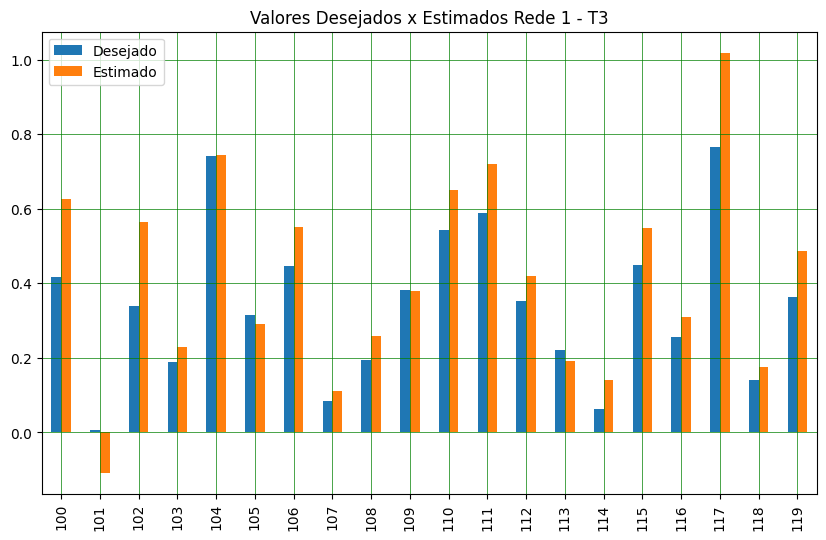

In [13]:
df_r1_predict = df_results_atividade_4[['f(t)', 'Rede 1 - T2']].rename(columns={'f(t)': 'Desejado', 'Rede 1 - T2': 'Estimado'})
df_r1_predict
df_r1_predict.plot(kind='bar',figsize=(10,6))
plt.title('Valores Desejados x Estimados Rede 1 - T3')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

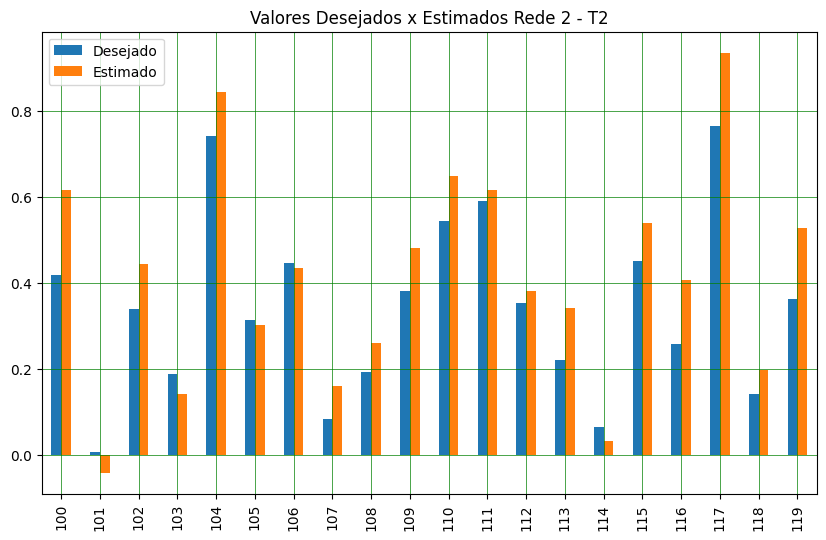

In [14]:
df_r2_predict = df_results_atividade_4[['f(t)', 'Rede 2 - T2']].rename(columns={'f(t)': 'Desejado', 'Rede 2 - T2': 'Estimado'})
df_r2_predict
df_r2_predict.plot(kind='bar',figsize=(10,6))
plt.title('Valores Desejados x Estimados Rede 2 - T2')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

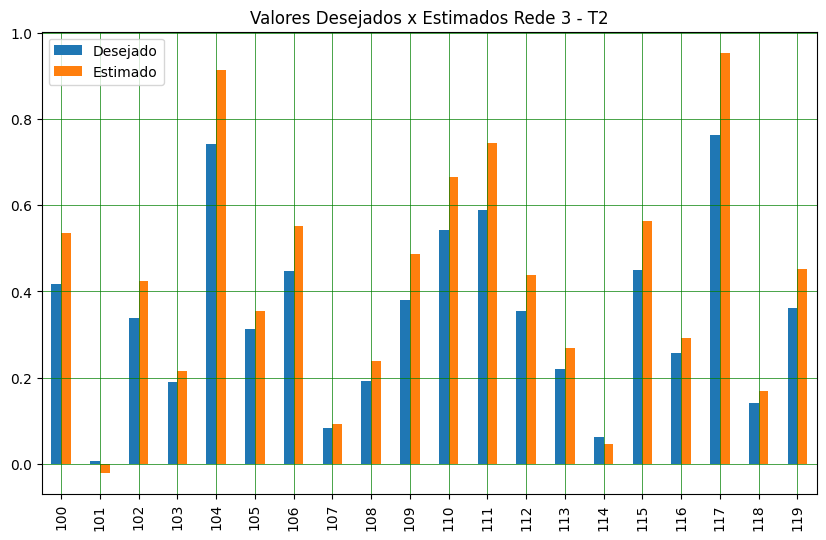

In [15]:
df_r3_predict = df_results_atividade_4[['f(t)', 'Rede 3 - T2']].rename(columns={'f(t)': 'Desejado', 'Rede 3 - T2': 'Estimado'})
df_r3_predict
df_r3_predict.plot(kind='bar',figsize=(10,6))
plt.title('Valores Desejados x Estimados Rede 3 - T2')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()